In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns

In [3]:
df = pd.read_csv('homework.csv')

In [4]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000  
- PTRATIO  pupil-teacher ratio by town

- BLACK    1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT    % lower status of the population

- MEDV     Median value of owner-occupied homes in $1000's

**Разбираемся, что означают все столбцы:**

Информация об атрибутах (по порядку):
     - CRIM    - уровень преступности на душу населения
     - ZN      - доля жилой земли, для участков более 25 000 кв. Футов.
     - INDUS   - доля не-розничных бизнес-кварталов на город
     - CHAS    - пересечение реки (= 1, если дорога ограничивает реку; 0 в противном случае)
     - NOX     - концентрация оксидов азота (на 10 миллионов)
     - RM      - среднее количество комнат в жилом помещении
     - AGE     - доля занимаемых владельцами квартир, построенных до 1940 года
     - DIS     - взвешенное расстояние до пяти бостонских центров занятости
     - RAD     - индекс доступности к радиальным магистралям
     - TAX     - налоговая ставка на $10 000
     - PTRATIO - cоотношение учеников и учителей в городе
     - BLACK   - 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих в городе.
     - LSTAT   - доля населения с низким статусом
     
     - MEDV    - Медианная стоимость домов, занимаемых владельцами, в $1000

В целом все показатели могут иметь отношение к стоимости жилья, даже доля чернокожих в городе.

In [5]:
df.shape

(333, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


Нулевых значений нет.

In [7]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


Обращают на себя внимание существенные различия между 75% квартилем и максимальным значением по столбцу crim. Построим гистограмму отдельно по столбцу crim.

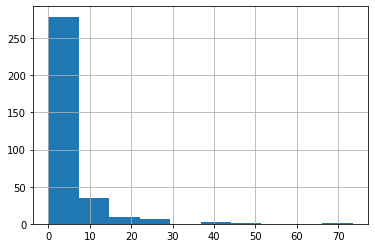

In [8]:
df['crim'].hist()

Отберем только значения с уровнем криминала больше 30.

In [9]:
df.query('crim > 30')

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
261,399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
268,415,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
271,419,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
275,428,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9


Всего получается 4 значения или 1,2% от общей БД. Уровень криминала более 73% означает, что почти 3 из 4 человек - преступники.  
**Очень странное место!**

In [10]:
# Не будем заниматься глобальным feature engineering'ом отбросим столбец ID, он не харрактеризует модель
df.drop('ID', axis=1, inplace=True)

In [11]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

#### ОБУЧЕНИЕ

In [12]:
# Формируем признаки и целевую переменную
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = df['medv']

In [13]:
# Разделяем данные на данные для обучения и проверки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [14]:
# Приводим данные к одному масштабу
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Обучаем модель множественной линейной регрессии - MLR (Multiple Linear Regression)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_mlr = LinearRegression()
model_mlr.fit(X_train, y_train) # Обучение

y_pred_mlr = model_mlr.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred_mlr)) # коэффициент детерминации
print("MSE: \t", mean_squared_error(y_test, y_pred_mlr))
print("MAE: \t", mean_absolute_error(y_test, y_pred_mlr))

R2: 	 0.7555113871687735
MSE: 	 16.630752672841975
MAE: 	 3.0807171914507196


Значение R2 высокое, но в модели мы используем довольно много признаков.

#### Обучаем модель Регрессия опорных векторов - SVR (Support Vector Regression)

In [16]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train, y_train)

y_pred_svr = model_svr.predict(X_test)

In [17]:
print("R2: \t", r2_score(y_test, y_pred_svr)) # коэффициент детерминации
print("MSE: \t", mean_squared_error(y_test, y_pred_svr))
print("MAE: \t", mean_absolute_error(y_test, y_pred_svr))

R2: 	 0.6763030308693284
MSE: 	 22.018711514703302
MAE: 	 3.075888899170488


Значение R2 меньше, чем при линейной регрессии

#### Обучаем модель Метод дерева решений

In [18]:
# Формируем классы для целевой функции
bins = np.linspace(min(df['medv']), max(df['medv']), 4)
group_names = ['low', 'medium', 'high']
df['medv_binned'] = pd.cut(df['medv'], bins, labels=group_names, include_lowest=True)

In [19]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,medv_binned
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,medium
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,medium
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,medium
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,high
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,medium


In [20]:
# Формируем признаки и целевую переменную
X_ = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y_ = df['medv_binned']

In [21]:
# Разделяем данные на данные для обучения и проверки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=40)

In [22]:
# Приводим данные к одному масштабу
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Обучаем модель
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion='gini')
model_tree.fit(X_train, y_train)

y_pred_tree = model_tree.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy_score: ', accuracy_score(y_test, y_pred_tree))

# Так и не получилось вывести метки для оценок. Что здесь может быть не так?
print('precision_score:', precision_score(y_test, y_pred_tree, labels=group_names, average=None)) 
print('recall_score: \t', recall_score(y_test, y_pred_tree, labels=group_names, average=None))
print('f1_score: \t', f1_score(y_test, y_pred_tree, labels=group_names, average=None))

accuracy_score:  0.746268656716418
precision_score: [0.72413793 0.80645161 0.57142857]
recall_score: 	 [0.84       0.69444444 0.66666667]
f1_score: 	 [0.77777778 0.74626866 0.61538462]


In [25]:
# Сводный график оценок
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

        high       0.57      0.67      0.62         6
         low       0.72      0.84      0.78        25
      medium       0.81      0.69      0.75        36

    accuracy                           0.75        67
   macro avg       0.70      0.73      0.71        67
weighted avg       0.75      0.75      0.75        67

